<a href="https://colab.research.google.com/github/Aswanthbiju/metal-defect-detection-yolov8/blob/main/Metal_Defect_Detection_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
uploaded = files.upload()


Saving ALL METAL DEFECTS.v1i.yolov8.zip to ALL METAL DEFECTS.v1i.yolov8.zip


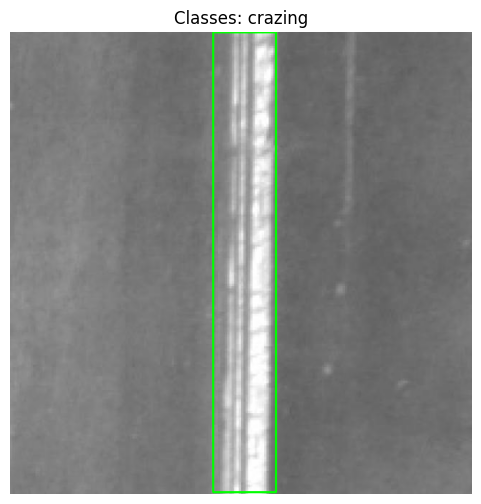

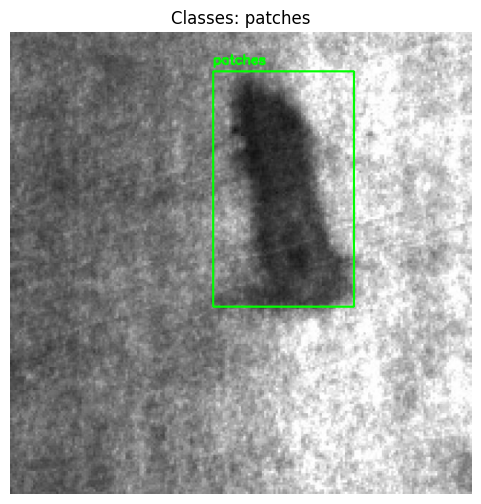

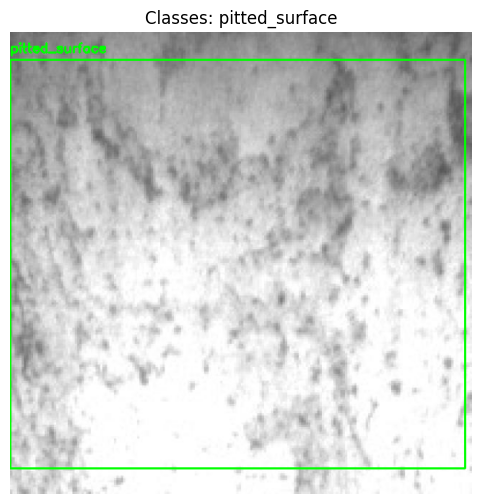

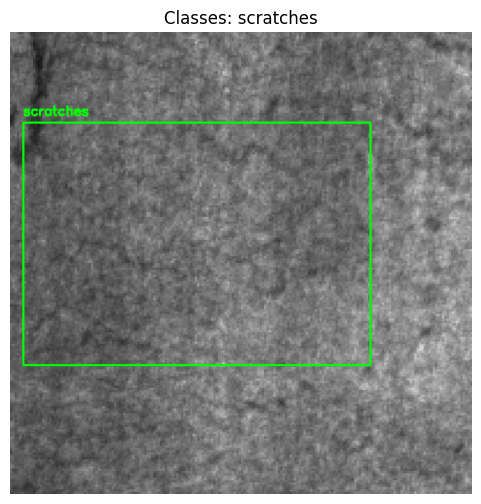

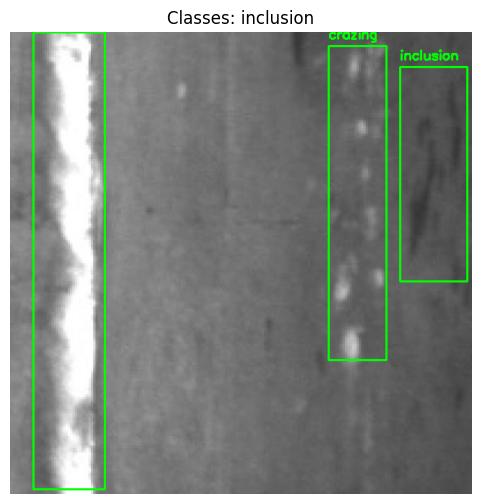

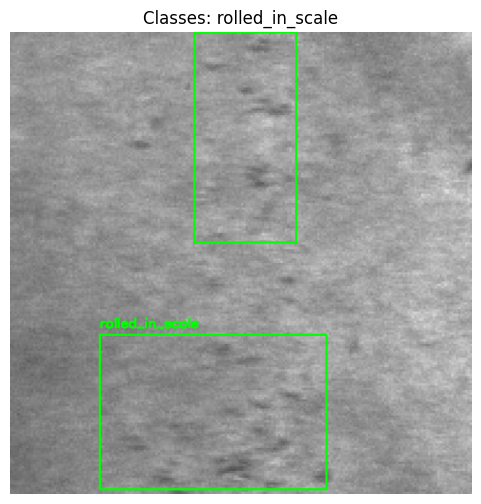

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

img_dir = "/content/metal_defects_all/train/images"
lbl_dir = "/content/metal_defects_all/train/labels"
class_names = ['scratches', 'inclusion', 'patches', 'pitted_surface', 'rolled_in_scale', 'crazing']

shown_classes = set()

for filename in os.listdir(img_dir):
    img_path = os.path.join(img_dir, filename)
    label_path = os.path.join(lbl_dir, filename.replace(".jpg", ".txt").replace(".png", ".txt"))

    if not os.path.exists(label_path):
        continue

    with open(label_path, "r") as f:
        lines = f.readlines()

    classes_in_image = {int(line.split()[0]) for line in lines}
    new_classes = classes_in_image - shown_classes

    if new_classes:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]

        for line in lines:
            cls, x, y, bw, bh = map(float, line.strip().split())
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)
            cls = int(cls)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, class_names[cls], (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis("off")
        plt.title("Classes: " + ", ".join([class_names[c] for c in new_classes]))
        plt.show()

        shown_classes.update(new_classes)

    if len(shown_classes) == len(class_names):
        break



**FINE TUNING THE MODEL**

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="4TRyvxyiOtUKOu1Ic5lG")
project = rf.workspace("ai-space-olvju").project("all-metal-defects")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ALL-METAL-DEFECTS-1 in yolov8:: 100%|██████████| 6900/6900 [00:01<00:00, 6776.89it/s]


In [ ]:

from ultralytics import YOLO

model = YOLO("yolov8x.pt")

model.train(
    data="/content/ALL-METAL-DEFECTS-1/data.yaml",
    epochs=20,
    imgsz=640
)


Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/ALL-METAL-DEFECTS-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

train: Scanning /content/ALL-METAL-DEFECTS-1/train/labels... 3013 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3013/3013 [00:01<00:00, 2477.67it/s]

train: WARNING ⚠️ /content/ALL-METAL-DEFECTS-1/train/images/crazing_120_jpg.rf.07a21193aad2b4c9912b32bdf50b726d.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/ALL-METAL-DEFECTS-1/train/images/crazing_120_jpg.rf.7e172fd8bf818efc0162fe82c883d332.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/ALL-METAL-DEFECTS-1/train/images/crazing_120_jpg.rf.f430c0acd55fe478c4b41b589cb35a62.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/ALL-METAL-DEFECTS-1/train/images/inclusion_62_jpg.rf.5774536653b7e9c229d5aa8510953b54.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/ALL-METAL-DEFECTS-1/train/images/inclusion_62_jpg.rf.7e63cd7b35ed8b4c3c21c7eb50572e45.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/ALL-METAL-DEFECTS-1/train/images/inclusion_62_jpg.rf.d6f87b6177a7357ff2ecdc23f6fdc073.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/ALL-METAL-DEFECTS-1/train/images/patches_198_jpg.rf.22b654e3b1551e22a624bf6aed1c5f80.jpg: 1 duplicate labe


val: Scanning /content/ALL-METAL-DEFECTS-1/valid/labels... 287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<00:00, 1000.20it/s]


val: New cache created: /content/ALL-METAL-DEFECTS-1/valid/labels.cache
Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      14.3G      1.809      2.505      1.959         24        640: 100%|██████████| 189/189 [03:52<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.14s/it]

                   all        287        654     0.0456      0.157     0.0449     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      12.3G      1.762      2.188       1.91         27        640: 100%|██████████| 189/189 [03:51<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]

                   all        287        654      0.335      0.258      0.225     0.0895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      12.6G       1.69      2.015      1.863         19        640: 100%|██████████| 189/189 [03:49<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        287        654      0.546       0.32      0.328      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      12.5G      1.663      1.962      1.805         33        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        287        654      0.293       0.44      0.303      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      12.3G       1.62      1.852      1.778         19        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        287        654      0.265      0.538      0.333      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      12.6G      1.573      1.745      1.722         16        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        287        654      0.635      0.477      0.477      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      12.6G      1.554      1.755      1.735         18        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        287        654      0.612      0.562       0.61      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      12.6G      1.489      1.613      1.678         19        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        287        654      0.531      0.543       0.56      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      12.3G      1.453       1.56      1.656         17        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        287        654      0.576      0.609      0.619      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      12.6G      1.465      1.558       1.65         24        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]

                   all        287        654      0.579      0.593      0.613        0.3


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      12.6G      1.514      1.564      1.748         12        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        287        654      0.573      0.619      0.645      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      12.5G      1.496      1.496      1.737         13        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        287        654      0.604      0.628      0.646      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      12.3G      1.463      1.453      1.707         16        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        287        654      0.614      0.617      0.649      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      12.6G      1.447      1.405      1.693         15        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        287        654      0.585      0.621      0.654      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      12.5G      1.393      1.351      1.661          9        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        287        654      0.584      0.623      0.643      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      12.5G      1.356      1.274      1.623         12        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        287        654      0.616      0.642       0.67      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      12.3G      1.329      1.231      1.586         14        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        287        654      0.623      0.685      0.694      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      12.5G      1.287       1.17      1.562          9        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        287        654      0.673      0.708      0.722      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      12.5G      1.243      1.115      1.534         12        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        287        654      0.659      0.697      0.726      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      12.5G      1.208      1.061      1.503          8        640: 100%|██████████| 189/189 [03:48<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        287        654      0.716      0.689      0.735      0.405



20 epochs completed in 1.455 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 136.7MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,129,346 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.06s/it]


                   all        287        654      0.714      0.691      0.736      0.405
               crazing         39         90      0.632        0.2      0.336      0.112
             inclusion         67        169      0.729      0.787      0.833      0.446
               patches         56        141      0.818      0.887      0.911       0.59
        pitted_surface         51         78      0.752      0.667      0.719      0.384
       rolled-in_scale         45         96      0.606      0.656      0.642      0.302
             scratches         47         80      0.749       0.95      0.972      0.597
Speed: 0.2ms preprocess, 26.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ebd25004b90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

**Inference Visualization**


image 1/1 /content/ALL-METAL-DEFECTS-1/valid/images/crazing_118_jpg.rf.f5068fc9d5a015b8b567357c638dd882.jpg: 640x640 2 crazings, 90.0ms
Speed: 3.0ms preprocess, 90.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


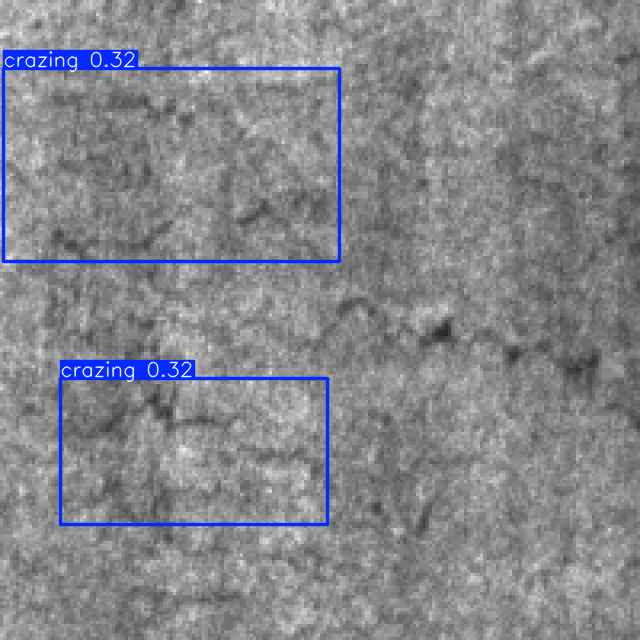

crazing

image 1/1 /content/ALL-METAL-DEFECTS-1/valid/images/scratches_139_jpg.rf.622faf6b8894a933ceccd35d6c4e414d.jpg: 640x640 2 inclusions, 1 scratches, 53.5ms
Speed: 2.5ms preprocess, 53.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


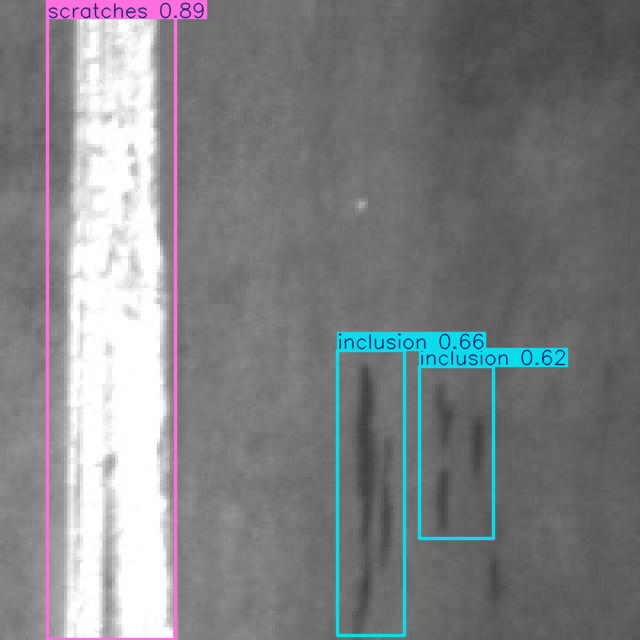

inclusion

image 1/1 /content/ALL-METAL-DEFECTS-1/valid/images/patches_159_jpg.rf.3f85c2866b335a027058ba7887439423.jpg: 640x640 1 inclusion, 2 patchess, 53.7ms
Speed: 3.6ms preprocess, 53.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


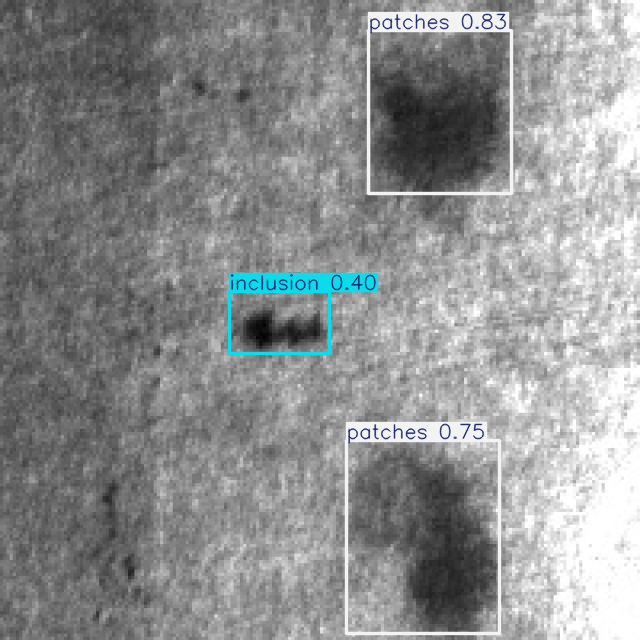

patches

image 1/1 /content/ALL-METAL-DEFECTS-1/valid/images/pitted_surface_101_jpg.rf.c5c17ae9fba19d723d7c3cd5fc421b78.jpg: 640x640 2 patchess, 2 pitted_surfaces, 53.7ms
Speed: 2.7ms preprocess, 53.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


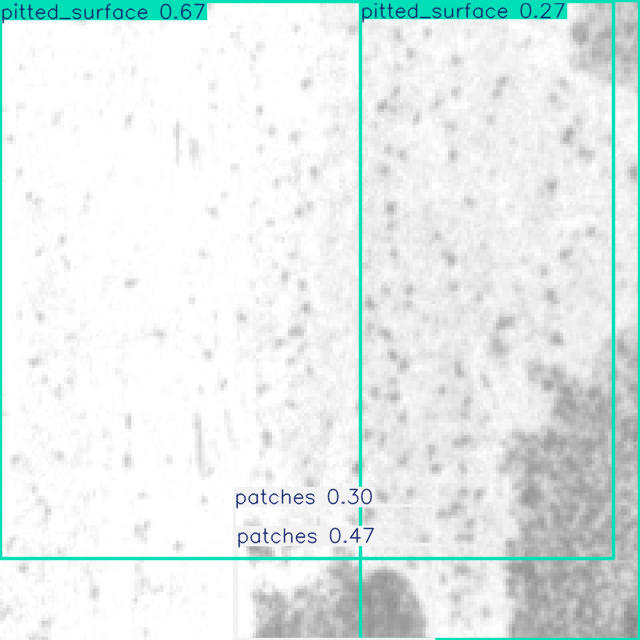

pitted_surface

image 1/1 /content/ALL-METAL-DEFECTS-1/valid/images/rolled-in_scale_150_jpg.rf.5e1e92c4e7669e7f4b61a24692133ca8.jpg: 640x640 4 rolled-in_scales, 48.1ms
Speed: 2.8ms preprocess, 48.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


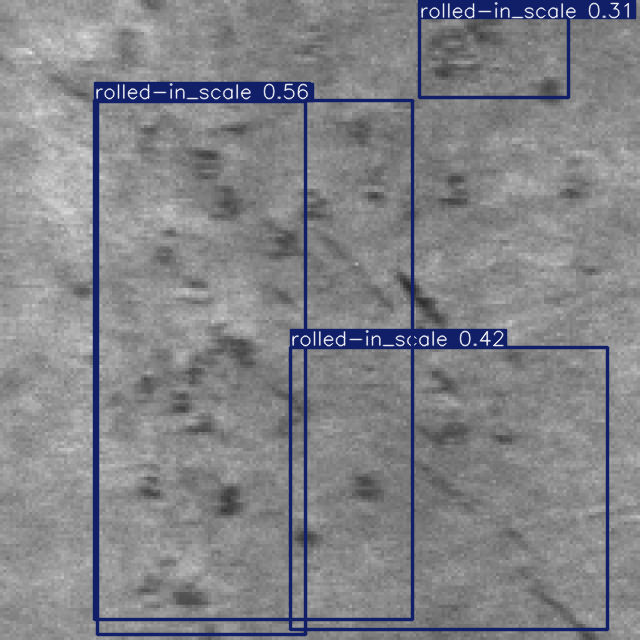

rolled-in_scale

image 1/1 /content/ALL-METAL-DEFECTS-1/valid/images/scratches_197_jpg.rf.43ea4f8d473668b3a88680bd3dbafd78.jpg: 640x640 2 scratchess, 48.4ms
Speed: 2.4ms preprocess, 48.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


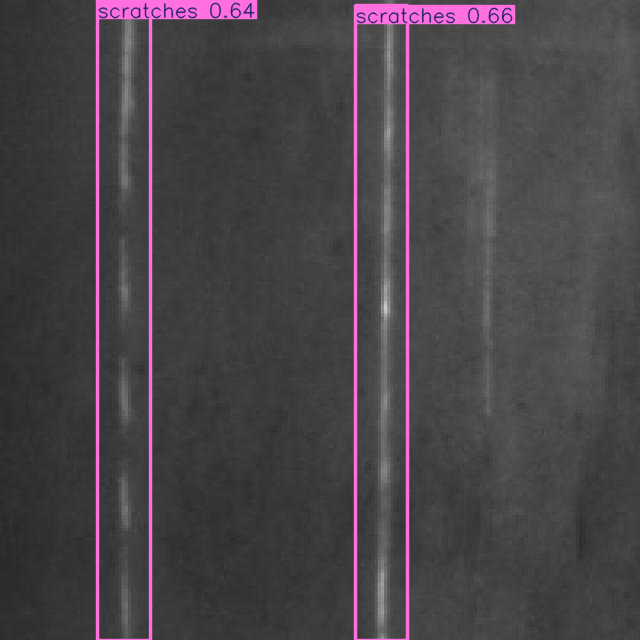

scratches


In [ ]:
from ultralytics import YOLO
from PIL import Image
import os

model = YOLO("runs/detect/train4/weights/best.pt")
val_dir = "/content/ALL-METAL-DEFECTS-1/valid/images"

class_files = {
    'crazing': 'crazing_118_jpg.rf.f5068fc9d5a015b8b567357c638dd882.jpg',
    'inclusion': 'scratches_139_jpg.rf.622faf6b8894a933ceccd35d6c4e414d.jpg',
    'patches': 'patches_159_jpg.rf.3f85c2866b335a027058ba7887439423.jpg',
    'pitted_surface': 'pitted_surface_101_jpg.rf.c5c17ae9fba19d723d7c3cd5fc421b78.jpg',
    'rolled-in_scale': 'rolled-in_scale_150_jpg.rf.5e1e92c4e7669e7f4b61a24692133ca8.jpg',
    'scratches': 'scratches_197_jpg.rf.43ea4f8d473668b3a88680bd3dbafd78.jpg'
}

for cls, fname in class_files.items():
    img_path = os.path.join(val_dir, fname)
    results = model(img_path)
    results[0].show()
    print(cls)





In [ ]:
import os
os.listdir("runs/detect")


['train2', 'train4', 'train3', 'train', 'val']

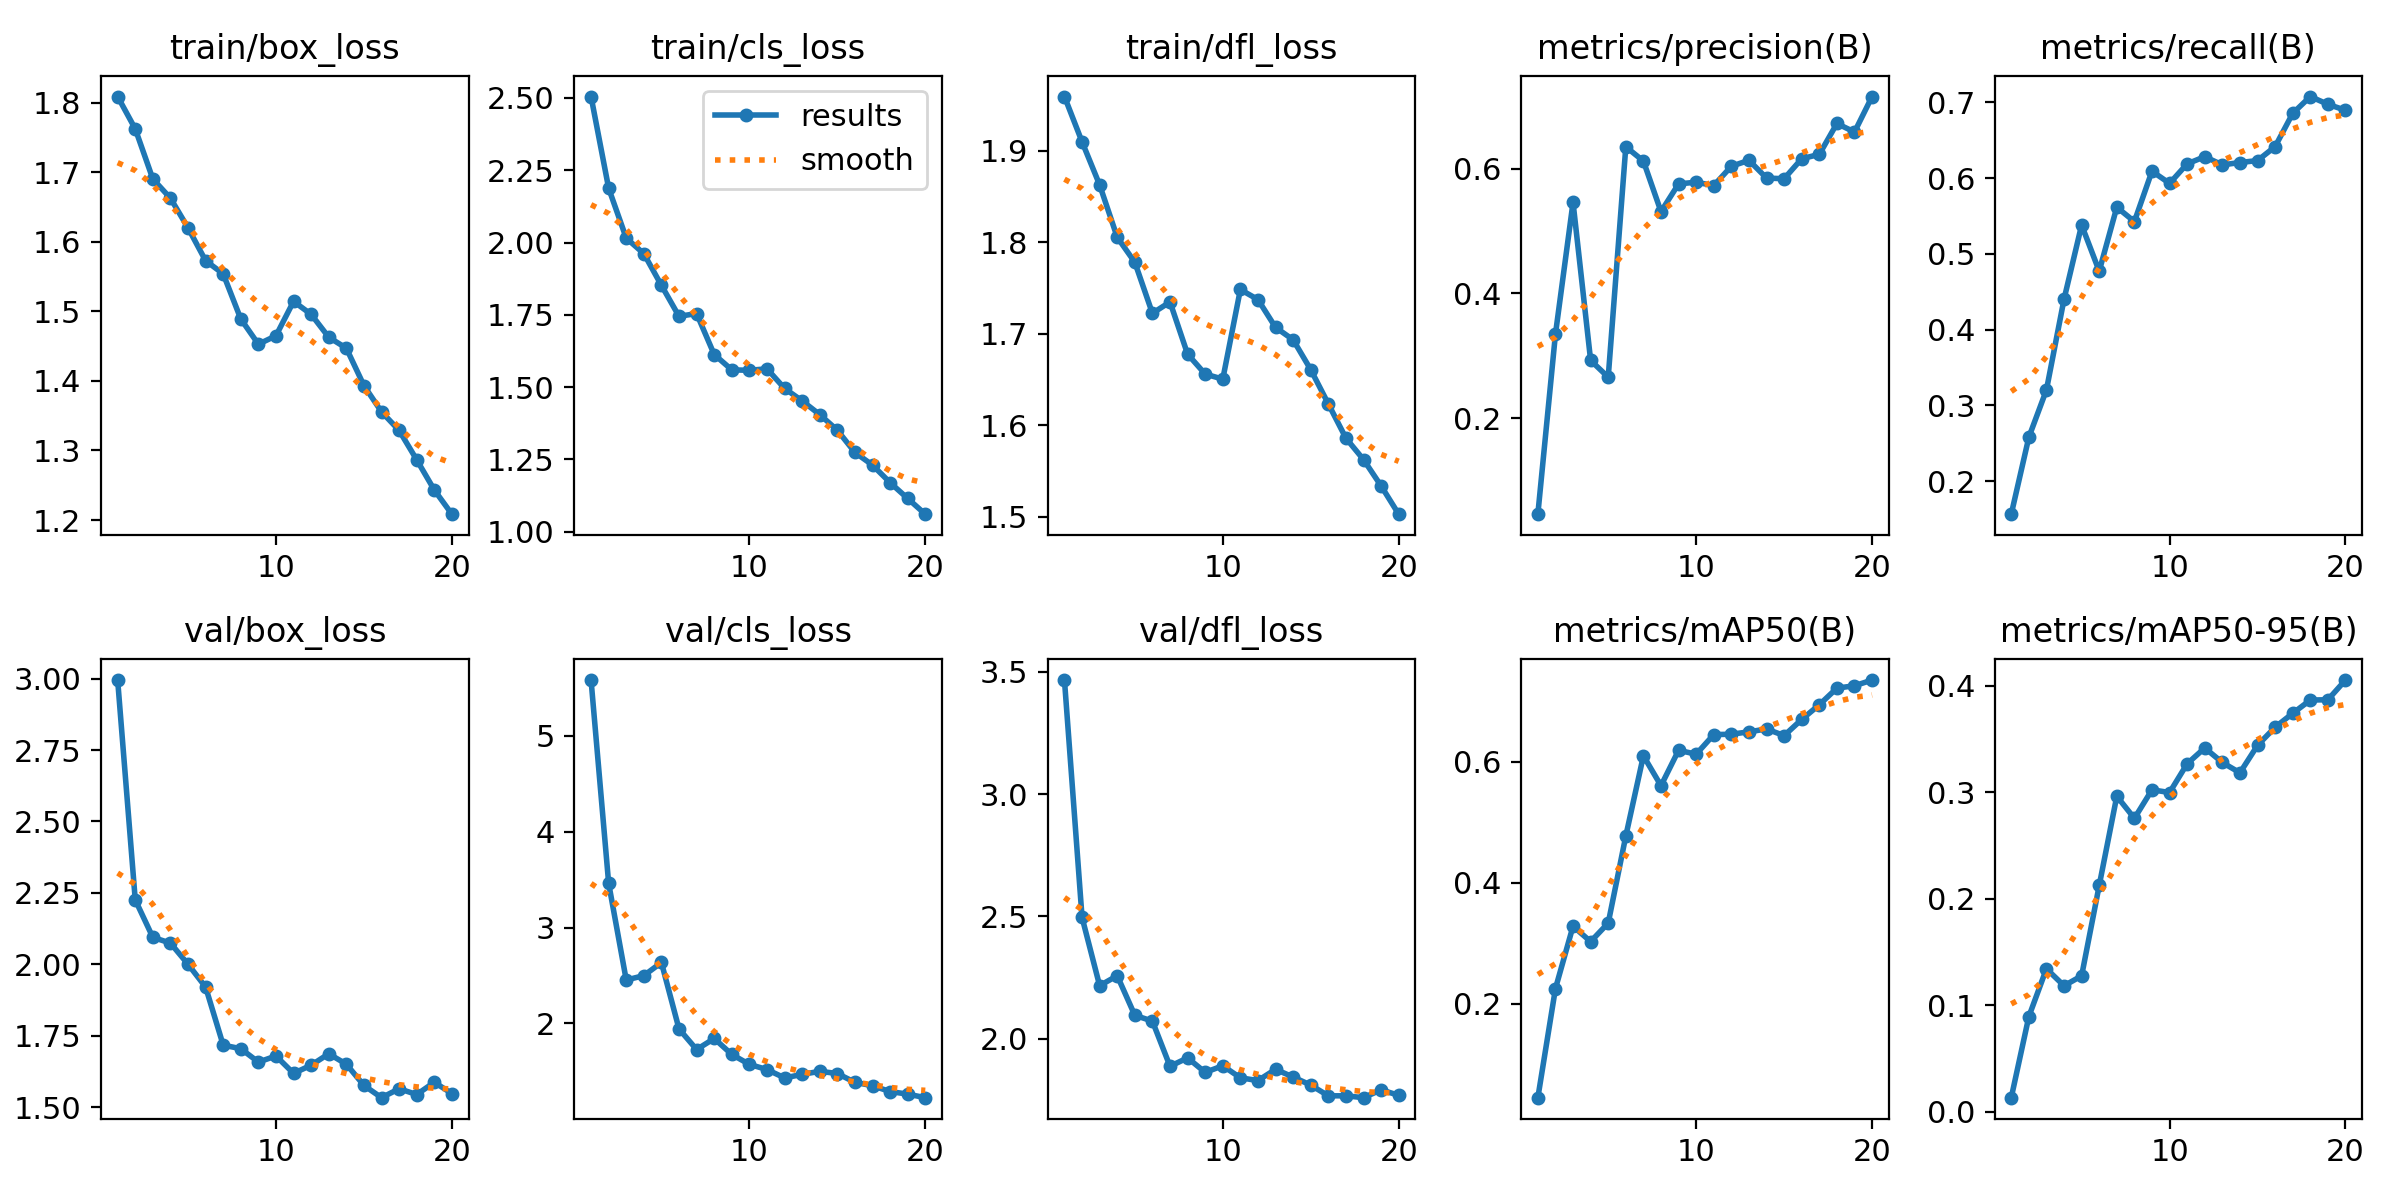

In [ ]:
from IPython.display import Image

Image(filename='runs/detect/train4/results.png')



In [ ]:
import os

train_dir = '/content/ALL-METAL-DEFECTS-1/train/images'
val_dir = '/content/ALL-METAL-DEFECTS-1/valid/images'
test_dir = '/content/ALL-METAL-DEFECTS-1/test/images'

num_train = len(os.listdir(train_dir))
num_val = len(os.listdir(val_dir))
num_test = len(os.listdir(test_dir))
total = num_train + num_val + num_test

print(f"Train Images: {num_train}")
print(f"Validation Images: {num_val}")
print(f"Test Images: {num_test}")
print(f"Total Images: {total}")


Train Images: 3013
Validation Images: 287
Test Images: 144
Total Images: 3444


**THANK YOU :)**

DATASET SOURCE : Ryan Cohn and Elizabeth Holm, Unsupervised machine learning via transfer learning and k-means clustering to classify materials image data, Integrating Materials and Manufacturing Innovation, 10, 2021 DOI: https://doi.org/10.1007/s40192-021-00205-8 ArXiv: http://arxiv.org/abs/2007.08361

Kechen Song and Yunhui Yan. “A noise robust method based on completed local binary patternsfor hot-rolled steel strip surface defects”. In:Applied Surface Science285 (Nov. 2013), pp 858-864.